In [1]:
#installing mlxtend
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#inmporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Books Dataset

In [3]:
books = pd.read_csv('book.csv')
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
books.shape

(2000, 11)

#### Aprori Algorithm

In [6]:
from mlxtend.frequent_patterns import apriori

In [8]:
frequent_itemsets_ap = apriori(books, min_support = 0.1)

C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
print(len(frequent_itemsets_ap))

39


In [10]:
frequent_itemsets_ap = apriori(books, min_support=0.1, use_colnames= True, verbose=1)
print(frequent_itemsets_ap.head())

Processing 44 combinations | Sampling itemset size 4
   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
frequent_itemsets_ap.sort_values("support", ascending = False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


In [12]:
from mlxtend.frequent_patterns import association_rules

In [13]:
rules_ap = association_rules(frequent_itemsets_ap, metric= "confidence", min_threshold=0.4)
print(rules_ap.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (YouthBks)  (ChildBks)              0.2475               0.423    0.165   
1   (CookBks)  (ChildBks)              0.4310               0.423    0.256   
2  (ChildBks)   (CookBks)              0.4230               0.431    0.256   
3  (DoItYBks)  (ChildBks)              0.2820               0.423    0.184   
4  (ChildBks)  (DoItYBks)              0.4230               0.282    0.184   

   confidence      lift  leverage  conviction  
0    0.666667  1.576044  0.060308    1.731000  
1    0.593968  1.404179  0.073687    1.421069  
2    0.605201  1.404179  0.073687    1.441240  
3    0.652482  1.542511  0.064714    1.660347  
4    0.434988  1.542511  0.064714    1.270770  


In [14]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(70, 9)

In [15]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
56,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
61,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
67,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
68,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
41,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

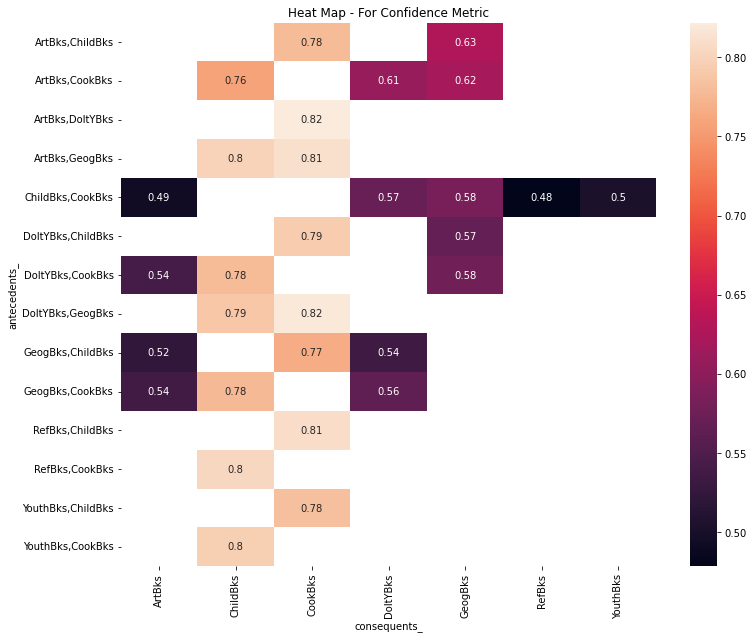

In [16]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [17]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.6)
print(rules_ap_li.shape)

(100, 9)


In [18]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
53,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

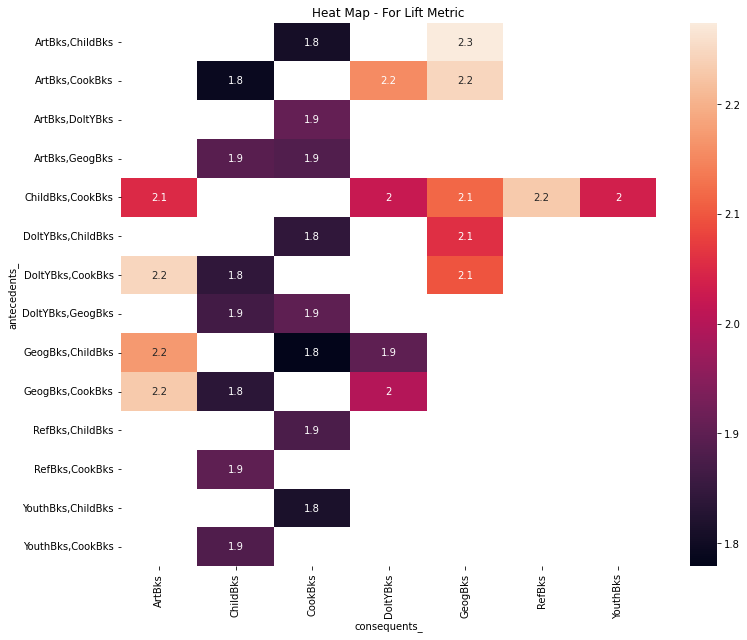

In [19]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#### FpGrowth Algorithm

In [20]:
from mlxtend.frequent_patterns import fpgrowth

In [21]:
frequent_itemsets_fp=fpgrowth(books, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [22]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
4,0.431,(CookBks)
3,0.423,(ChildBks)
0,0.282,(DoItYBks)
1,0.276,(GeogBks)
23,0.256,"(CookBks, ChildBks)"


In [23]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)
print(rules_fp.shape)

(49, 9)


In [24]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
46,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,2
41,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797,2
43,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,2
44,"(GeogBks, CookBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657,2
47,"(GeogBks, ChildBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'YouthBks')])

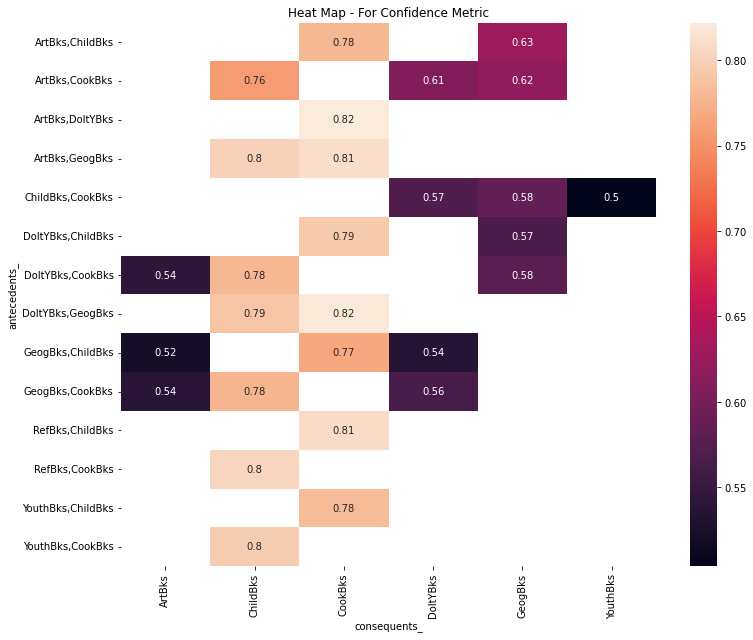

In [25]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations
plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [26]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.6)
print(rules_fp_li.shape)

(100, 9)


In [27]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
93,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
87,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
88,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
59,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

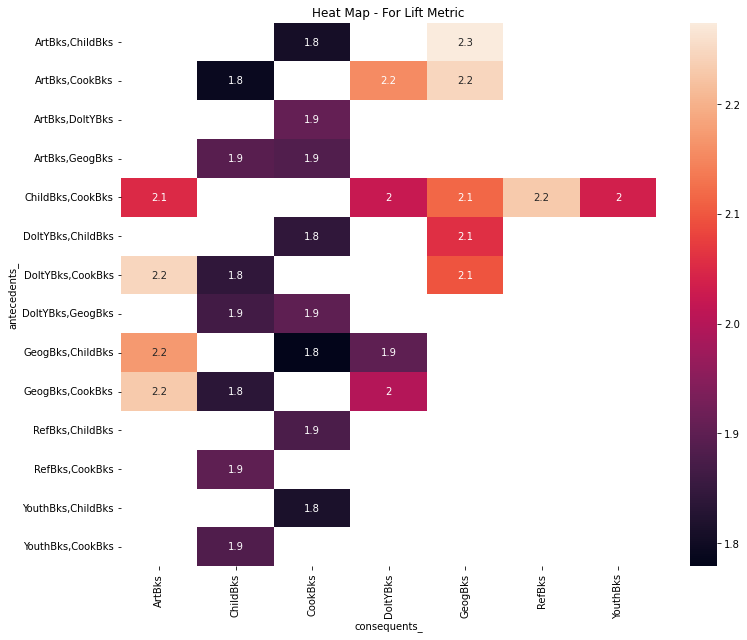

In [28]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# MY MOVIES Dataset

In [29]:
movies = pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [30]:
# Get list of categorical variables
s = (movies.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [31]:
num_movies = movies.iloc[:,5:15]
num_movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


#### Apriori Algorithm

In [32]:
frequent_itemsets_ap = apriori(num_movies, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [33]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

In [34]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4  (Sixth Sense)   (Green Mile)                 0.6                 0.2   

   support  confidence      lift  leverage  conviction  
0      0.5    0.714286  1.190476      0.08         1.4  
1      0.5    0.833333  1.190476      0.08         1.8  
2      0.4    0.666667  1.111111      0.04         1.2  
3      0.4    0.666667  1.111111      0.04         1.2  
4      0.2    0.333333  1.666667      0.08         1.2  


In [35]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 9)

In [36]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

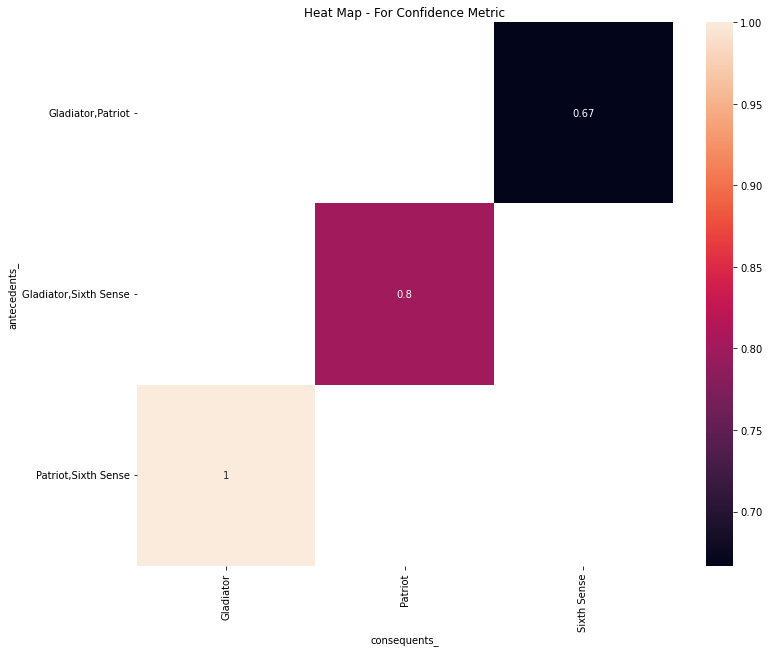

In [37]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations
plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [38]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 9)


In [39]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

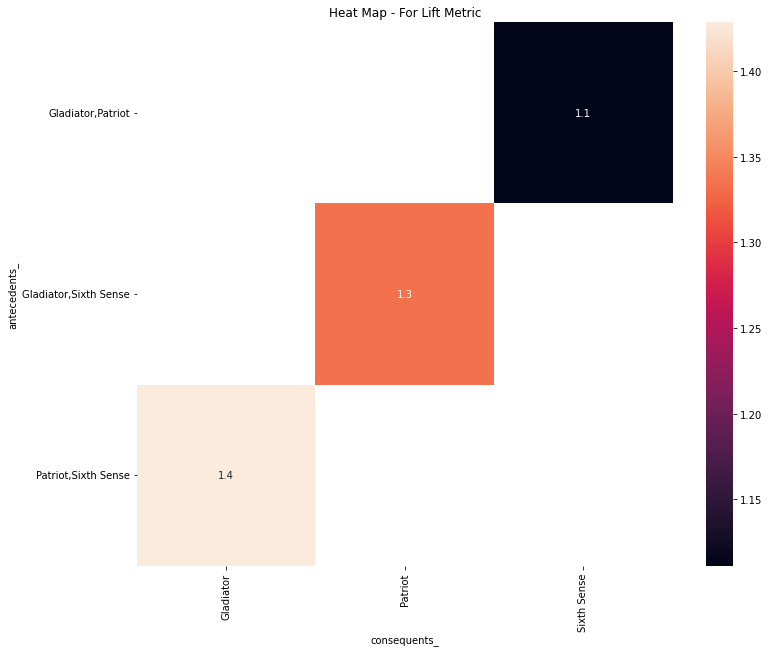

In [40]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#### FpGrowth Algorithm

In [41]:
frequent_itemsets_fp=fpgrowth(num_movies, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


C:\Users\Pushpalatha\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [42]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Gladiator, Patriot)"
6,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


In [43]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1  (Gladiator, Sixth Sense)      (Patriot)                 0.5   
2    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
3              (Green Mile)  (Sixth Sense)                 0.2   
4   (Gladiator, Green Mile)  (Sixth Sense)                 0.1   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.6      0.4    0.800000  1.333333      0.10         2.0  
2                 0.7      0.4    1.000000  1.428571      0.12         inf  
3                 0.6      0.2    1.000000  1.666667      0.08         inf  
4                 0.6      0.1    1.000000  1.666667      0.04         inf  


In [44]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(8, 9)

In [45]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
97,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
23,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
80,"(Harry Potter1, LOTR2, Sixth Sense)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
74,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
73,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Gladiator,Green Mile'),
  Text(2.5, 0, 'Gladiator,Sixth Sense'),
  Text(3.5, 0, 'Green Mile'),
  Text(4.5, 0, 'Harry Potter1'),
  Text(5.5, 0, 'Harry Potter1,Green Mile'),
  Text(6.5, 0, 'Harry Potter1,LOTR1'),
  Text(7.5, 0, 'Harry Potter1,LOTR1,Green Mile'),
  Text(8.5, 0, 'Harry Potter1,LOTR1,Sixth Sense'),
  Text(9.5, 0, 'Harry Potter1,LOTR2'),
  Text(10.5, 0, 'Harry Potter1,LOTR2,Green Mile'),
  Text(11.5, 0, 'Harry Potter1,LOTR2,Sixth Sense'),
  Text(12.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(13.5, 0, 'LOTR'),
  Text(14.5, 0, 'LOTR1'),
  Text(15.5, 0, 'LOTR1,Green Mile'),
  Text(16.5, 0, 'LOTR1,LOTR2'),
  Text(17.5, 0, 'LOTR1,LOTR2,Green Mile'),
  Text(18.5, 0, 'LOTR1,LOTR2,Sixth Sense'),
  Text(19.5, 0, 'LOTR1,Sixth Sense'),
  Text(20.

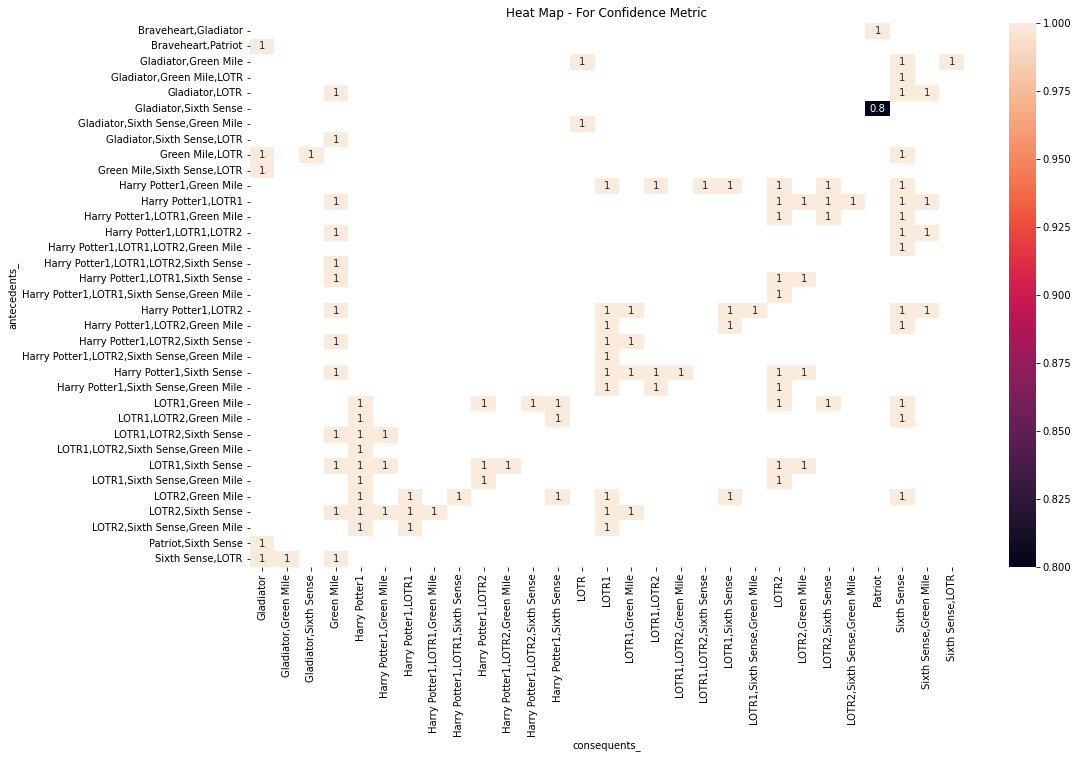

In [46]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations
plt.figure(figsize=(16,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [47]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)


(246, 9)


In [48]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
221,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,2
55,"(Harry Potter1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
57,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
58,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
170,"(Harry Potter1, LOTR1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(1.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Gladiator,Green Mile'),
  Text(3.5, 0, 'Gladiator,LOTR'),
  Text(4.5, 0, 'Gladiator,Sixth Sense'),
  Text(5.5, 0, 'Green Mile'),
  Text(6.5, 0, 'Green Mile,LOTR'),
  Text(7.5, 0, 'Harry Potter1'),
  Text(8.5, 0, 'Harry Potter1,Green Mile'),
  Text(9.5, 0, 'Harry Potter1,LOTR1'),
  Text(10.5, 0, 'Harry Potter1,LOTR1,Green Mile'),
  Text(11.5, 0, 'Harry Potter1,LOTR1,LOTR2'),
  Text(12.5, 0, 'Harry Potter1,LOTR1,Sixth Sense'),
  Text(13.5, 0, 'Harry Potter1,LOTR2'),
  Text(14.5, 0, 'Harry Potter1,LOTR2,Green Mile'),
  Text(15.5, 0, 'Harry Potter1,LOTR2,Sixth Sense'),
  Text(16.5, 0, 'Harry Potter1,Sixth Sense'),
  Text(17.5, 0, 'Harry Potter1,Sixth Sense,Green Mile'),
  Text(18.5,

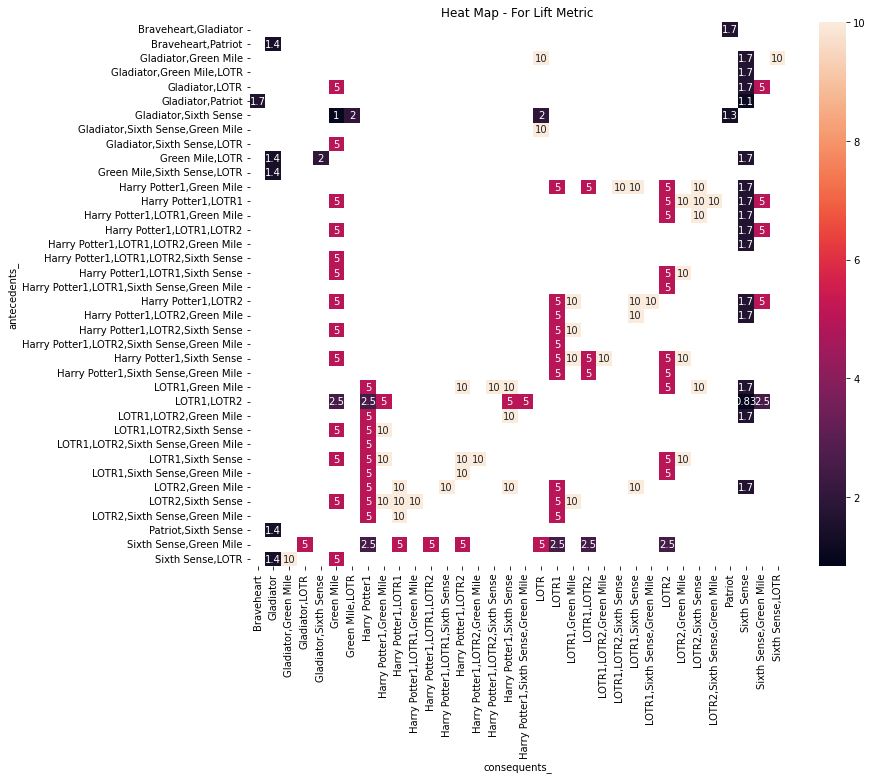

In [49]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)